# PANDAS, MATPLOTLIB & SEABORN TO VISUALIZE PHENOTYPE DATA

Marc Creixell - April 2020

For the best lab manager there is:
$$Dr.Scott Taylor$$

## 0-Contents

1. **Introduction**
2. **Import Libraries and Functions**
3. **Pandas Primer**
    - 3.3 Import data sets
    - 3.2 Indices and Columns
    - 3.3 `.shape`, `.size`, and `len()`
    - 3.4 Printing DataFrames in Jupyter Notebooks
    - 3.5 Dropping NaNs
    - 3.6 `.iloc` vs `.loc`
    - 3.7 Further useful attributes: `.str.contains()`, `.concat()`, `.drop()`, `.insert()`, and `.assign()`
    - 3.8 Compute `.mean()` and `.std()`
    - 3.9 `.values`
4. **Assertions**
5. **Plotting Time Courses with `sns.lineplot()`** 
    - 5.1 Import Data
    - 5.2 Define Arguments and Plot
    - 5.3 Code Review
    - 5.4 Using `plt.subplots()` to generate multiple plots at once
6. **Plotting EndPoints with `sns.barplot()`**
    - 6.1 Define Arguments and Plot
    - 6.2 Code Review
    - 6.3 Implementation
7. **Plotting Heatmaps with `sns.clustermap()`** 

## 1-Introduction

In this tutorial we're going to go through the functions I use to illustrate the phenotype data. A fundamental basis for both `matplotlib` and `seaborn` libraries would be helpful. These two tutorials get at most of the essentials:

- Matplotlib: https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python
- Seaborn: https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

In addition, another major goal of this notebook is to provide an ad-hoc overview of `pandas` attributes I use all the time to preprocess and format the data and subsequently plot it.

There are mainly three functions I use recurrently to plot phenotypic data: `FC_timecourse` and `barplot_UtErlAF154`. The first one is used to plot measurements over time, and the other two generate bar plots at a specified time point. In this tutorial I'm going to be using the cell viability data but in the notebook `Fig2-CellMmigration.ipynb` you will see the same re-implementation with the cell migration measurements. 

## 2-Import Libraries and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from msresist.figures.figure1 import FC_timecourse, barplot_UtErlAF154, barplotFC_TvsUT

This sets a common format for all seaborn plots that we use in the lab

In [52]:
sns.set(style="whitegrid", font_scale=1.15, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})
#Why do we use this format? What does it look like? What does it look like if I don't use it?

## 3-Pandas primer

`Pandas` is the best library to import, preprocess, and format data tables. Once you have a data table of the type `pandas.core.frame.DataFrame`, you can apply extremely useful pandas attributes to manipuate your data set following the typical structure: `dataframe.a()`. As a general note, every time I need to figure out something with pandas, I pay special attention to links directing me to *GeeksforGeeks*'s tutorials (eg: https://www.geeksforgeeks.org/python-extracting-rows-using-pandas-iloc/).

### 3.1-Import data sets:

`pandas.read_csv` allows you to import *csv* files

In [3]:
df = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR1_Phase.csv')
#takes string of a file name into a df


`pandas.read_csv` allows you to import *csv* files into pandas dataframes. Use `.head()` to take a preliminary look at the dataframe. By default it will show 5 rows, but you can pass an integer to display the desired number of rows. Note that the dimensions showed under the table refer to this particular portion of the entire data set.

In [4]:
df.head(10)
#is df.tail a thing?
#df.tail() - yes
#Way to display middle of data - besides loc/iloc


,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,...,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
0,0,4.265529,3.979150,3.888071,3.374679,3.473018,3.062091,4.434666,3.606998,3.923480,3.686892,3.372610,3.099534,4.367269,4.375888,...,4.912151,4.653143,4.132826,5.119837,4.498675,4.585951,4.882211,4.547114,4.700694,4.494032,3.529023,3.536461,8.315177,7.249392,7.839774
1,3,4.603372,4.210015,4.329306,3.581867,3.620124,3.240773,4.857429,3.806620,4.078227,3.963478,3.637136,3.323256,4.845846,4.620260,...,5.434446,4.899639,4.342677,5.457837,4.714871,5.030444,5.166999,4.680759,4.989832,5.000840,4.551512,3.702770,9.123962,7.896763,8.415285
2,6,5.198959,4.734689,4.959818,3.930657,3.960487,3.733739,5.109839,4.280131,4.562384,4.387531,3.954196,3.653655,5.281611,4.935362,...,5.585685,5.118164,4.466831,5.643343,5.036379,5.346017,5.293747,4.929380,5.022522,5.027651,4.303786,3.890741,9.505661,7.755633,8.779768
3,9,5.445155,5.290838,5.569117,3.977962,4.315785,3.985393,5.499467,4.699266,5.051327,4.559393,4.345574,3.945545,5.596754,5.486663,...,6.131556,5.562152,4.848667,6.311236,5.657288,5.889382,5.520364,5.395078,5.270713,5.531851,4.927126,4.321213,10.086495,8.324027,9.785594
4,12,6.010536,5.733890,6.128141,4.259642,4.785299,4.207994,5.805937,5.094343,5.470478,5.163161,4.787191,4.362885,6.270767,5.942621,...,6.351329,6.075311,5.378995,6.775718,6.071787,6.367338,6.275125,6.025336,6.108309,5.926921,5.603986,4.318674,10.833190,9.015541,10.610790
5,15,6.448761,6.224083,6.924785,4.783654,5.150411,4.810608,6.448235,5.578821,6.089721,5.641274,5.225388,4.796288,6.685758,6.227136,...,6.885988,6.421690,5.513993,7.157978,6.215867,6.899646,6.621707,6.272563,6.387456,6.316624,5.681846,5.046820,11.203650,9.108001,10.494625
6,18,6.803424,6.637292,7.146177,4.991579,5.407138,4.747390,6.807180,5.770166,6.391846,5.948092,5.625697,4.910621,7.053574,6.297804,...,7.411652,6.737598,6.012320,7.556865,6.662697,7.207666,6.818462,6.443208,6.982838,6.845997,5.514512,5.293440,11.965060,9.575706,11.346420
7,21,7.371018,7.169648,7.805766,5.409302,5.759765,5.310717,7.243190,6.502526,7.129226,6.348641,5.957269,5.362127,7.648369,6.979335,...,7.825393,7.298684,6.483624,8.217657,7.253557,7.808155,7.286331,7.030048,7.398505,7.227252,6.408250,5.123791,12.624630,10.086012,12.505990
8,24,7.881563,7.487045,8.276305,5.703630,6.073371,5.388378,7.492433,6.788735,7.333431,6.666487,6.294478,5.582461,8.059933,7.627662,...,8.122500,7.590485,6.740439,8.761158,7.583712,8.185309,7.558722,7.126298,7.889948,7.443591,6.754015,6.168686,13.277965,10.242881,12.992855
9,27,8.618982,8.277896,9.105837,6.156892,6.625566,5.857920,8.465013,7.373832,8.146457,7.355912,6.855257,6.250908,8.490417,8.253660,...,8.301615,8.336600,7.503305,9.210316,8.132886,8.443195,8.182289,7.924607,8.411836,7.968476,7.363943,5.966920,13.811900,10.461992,13.886390


### 3.2-Indices and Columns

As you can see, pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Pandas DataFrame consists of three principal components, the data, rows (or `.index`), and `.columns`.

In [53]:
display(df.columns)
#df.rows does not exists, use index
df.index


Index(['PC9-UT', 'PC9-A/E', 'PC9-E', 'AXL KO-UT', 'AXL KO-A/E', 'AXL KO-E',
       'Kin-UT', 'Kin-A/E', 'Kin-E', 'Kdead-UT', 'Kdead-A/E', 'Kdead-E',
       'M4-UT', 'M4-A/E', 'M4-E', 'M5-UT', 'M5-A/E', 'M5-E', 'M7-UT', 'M7-A/E',
       'M7-E', 'M10-UT', 'M10-A/E', 'M10-E', 'M11-UT', 'M11-A/E', 'M11-E',
       'M15-UT', 'M15-A/E', 'M15-E', 'Elapsed 3'],
      dtype='object')

[RangeIndex(start=0, stop=46, step=1)]

You can create lists off of both attributes:

In [57]:
#list(df.columns)
list(df.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45]

#### RE-ORDER DATA FRAMES USING `.sort_values()`, `.reindex()` or specifying column labels

In [7]:
z = df.iloc[:5, :5]

z
#df.iloc[:,] == df.iloc[:] but df.iloc[,: fails]
#Explain what you're doing better? Like "Taking first 5 rows and columns as an example data set"

,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT
0,0,4.265529,3.979150,3.888071,3.374679
1,3,4.603372,4.210015,4.329306,3.581867
2,6,5.198959,4.734689,4.959818,3.930657
3,9,5.445155,5.290838,5.569117,3.977962
4,12,6.010536,5.733890,6.128141,4.259642


In [8]:
print(z.sort_values(by="Elapsed", ascending=False))
print(z.sort_values(by=0, axis=1))
#More examples - rows vs columns

   Elapsed    PC9-UT   PC9-A/E     PC9-E  AXL KO-UT
4       12  6.010536  5.733890  6.128141   4.259642
3        9  5.445155  5.290838  5.569117   3.977962
2        6  5.198959  4.734689  4.959818   3.930657
1        3  4.603372  4.210015  4.329306   3.581867
0        0  4.265529  3.979150  3.888071   3.374679
   Elapsed  AXL KO-UT     PC9-E   PC9-A/E    PC9-UT
0        0   3.374679  3.888071  3.979150  4.265529
1        3   3.581867  4.329306  4.210015  4.603372
2        6   3.930657  4.959818  4.734689  5.198959
3        9   3.977962  5.569117  5.290838  5.445155
4       12   4.259642  6.128141  5.733890  6.010536


We're covering different ways to `.insert()` columns as well as to `set_index` below, so don't worry too much about them for now. Just remember that in order to use `.reindex()`, you need to `set_index()` first. 

In [9]:
z.insert(1, "Names", ["A", "B", "C", "D", "E"])
display(z)
z.set_index("Names").reindex(["B", "E", "D", "A", "C"])
#mention why use display instead of print

,Elapsed,Names,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT
0,0,A,4.265529,3.979150,3.888071,3.374679
1,3,B,4.603372,4.210015,4.329306,3.581867
2,6,C,5.198959,4.734689,4.959818,3.930657
3,9,D,5.445155,5.290838,5.569117,3.977962
4,12,E,6.010536,5.733890,6.128141,4.259642


,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT
Names,,,,,
B,3,4.603372,4.210015,4.329306,3.581867
E,12,6.010536,5.733890,6.128141,4.259642
D,9,5.445155,5.290838,5.569117,3.977962
A,0,4.265529,3.979150,3.888071,3.374679
C,6,5.198959,4.734689,4.959818,3.930657


In [10]:
new_order = ["AXL KO-UT", "PC9-UT", "Elapsed", "PC9-E",'Names', "PC9-A/E"]
display(z[new_order])
#displays df in order by columns
'''
summary so far:
To display portion of df - df.loc[rows,columns]
to sort - df.sort_values(column/row to sort all by, axis = 0 for sorting rows up and down, axis = 1 for columns left to right)
df.inser(index of columns, "title", list of values)
need to set index as certain column before reindexing
'''

,AXL KO-UT,PC9-UT,Elapsed,PC9-E,Names,PC9-A/E
0,3.374679,4.265529,0,3.888071,A,3.979150
1,3.581867,4.603372,3,4.329306,B,4.210015
2,3.930657,5.198959,6,4.959818,C,4.734689
3,3.977962,5.445155,9,5.569117,D,5.290838
4,4.259642,6.010536,12,6.128141,E,5.733890


'\nsummary so far:\nTo display portion of df - df.loc[rows,columns]\nto sort - df.sort_values(column/row to sort all by, axis = 0 for sorting rows up and down, axis = 1 for columns left to right)\ndf.inser(index of columns, "title", list of values)\nneed to set index as certain column before reindexing\n'

### 3.3- `.shape`, `.size`, and `len()`

You can see the dimensions of the full data set immediately under the data set when you print it:

In [11]:
df

,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,...,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
0,0,4.265529,3.979150,3.888071,3.374679,3.473018,3.062091,4.434666,3.606998,3.923480,3.686892,3.372610,3.099534,4.367269,4.375888,...,4.912151,4.653143,4.132826,5.119837,4.498675,4.585951,4.882211,4.547114,4.700694,4.494032,3.529023,3.536461,8.315177,7.249392,7.839774
1,3,4.603372,4.210015,4.329306,3.581867,3.620124,3.240773,4.857429,3.806620,4.078227,3.963478,3.637136,3.323256,4.845846,4.620260,...,5.434446,4.899639,4.342677,5.457837,4.714871,5.030444,5.166999,4.680759,4.989832,5.000840,4.551512,3.702770,9.123962,7.896763,8.415285
2,6,5.198959,4.734689,4.959818,3.930657,3.960487,3.733739,5.109839,4.280131,4.562384,4.387531,3.954196,3.653655,5.281611,4.935362,...,5.585685,5.118164,4.466831,5.643343,5.036379,5.346017,5.293747,4.929380,5.022522,5.027651,4.303786,3.890741,9.505661,7.755633,8.779768
3,9,5.445155,5.290838,5.569117,3.977962,4.315785,3.985393,5.499467,4.699266,5.051327,4.559393,4.345574,3.945545,5.596754,5.486663,...,6.131556,5.562152,4.848667,6.311236,5.657288,5.889382,5.520364,5.395078,5.270713,5.531851,4.927126,4.321213,10.086495,8.324027,9.785594
4,12,6.010536,5.733890,6.128141,4.259642,4.785299,4.207994,5.805937,5.094343,5.470478,5.163161,4.787191,4.362885,6.270767,5.942621,...,6.351329,6.075311,5.378995,6.775718,6.071787,6.367338,6.275125,6.025336,6.108309,5.926921,5.603986,4.318674,10.833190,9.015541,10.610790
5,15,6.448761,6.224083,6.924785,4.783654,5.150411,4.810608,6.448235,5.578821,6.089721,5.641274,5.225388,4.796288,6.685758,6.227136,...,6.885988,6.421690,5.513993,7.157978,6.215867,6.899646,6.621707,6.272563,6.387456,6.316624,5.681846,5.046820,11.203650,9.108001,10.494625
6,18,6.803424,6.637292,7.146177,4.991579,5.407138,4.747390,6.807180,5.770166,6.391846,5.948092,5.625697,4.910621,7.053574,6.297804,...,7.411652,6.737598,6.012320,7.556865,6.662697,7.207666,6.818462,6.443208,6.982838,6.845997,5.514512,5.293440,11.965060,9.575706,11.346420
7,21,7.371018,7.169648,7.805766,5.409302,5.759765,5.310717,7.243190,6.502526,7.129226,6.348641,5.957269,5.362127,7.648369,6.979335,...,7.825393,7.298684,6.483624,8.217657,7.253557,7.808155,7.286331,7.030048,7.398505,7.227252,6.408250,5.123791,12.624630,10.086012,12.505990
8,24,7.881563,7.487045,8.276305,5.703630,6.073371,5.388378,7.492433,6.788735,7.333431,6.666487,6.294478,5.582461,8.059933,7.627662,...,8.122500,7.590485,6.740439,8.761158,7.583712,8.185309,7.558722,7.126298,7.889948,7.443591,6.754015,6.168686,13.277965,10.242881,12.992855
9,27,8.618982,8.277896,9.105837,6.156892,6.625566,5.857920,8.465013,7.373832,8.146457,7.355912,6.855257,6.250908,8.490417,8.253660,...,8.301615,8.336600,7.503305,9.210316,8.132886,8.443195,8.182289,7.924607,8.411836,7.968476,7.363943,5.966920,13.811900,10.461992,13.886390


or by using `.shape`.

In [12]:
df.shape

(46, 31)

In [13]:
df.size #46x31

1426

In [14]:
df.columns.size

31

In [15]:
df.index.size

46

In [16]:
len(df.columns)

31

In [17]:
len(df.index)

46

You will find this attribute particularly useful in many situations as you will see in my functions. For instance, to build iterative loops based on the data frame's dimensions:

In [18]:
for i in range(df.shape[1]):
    print(df.columns[i])

Elapsed
PC9-UT
PC9-A/E
PC9-E
AXL KO-UT
AXL KO-A/E
AXL KO-E
Kin-UT
Kin-A/E
Kin-E
Kdead-UT
Kdead-A/E
Kdead-E
M4-UT
M4-A/E
M4-E
M5-UT
M5-A/E
M5-E
M7-UT
M7-A/E
M7-E
M10-UT
M10-A/E
M10-E
M11-UT
M11-A/E
M11-E
M15-UT
M15-A/E
M15-E


### 3.4-Printing DataFrames in Jupyter Notebooks

It is important to make sure you know exactly what is inside the table. The code below allows you to modify the width of each column, the maximum number of rows, and the maximum number of columns to display. 

In [19]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_columns', 1000)

For instance, by just the preview above, you wouldn't have been able to spot the `NaN` values that this dataframe contains. Make sure you find them:

In [20]:
df

,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,M4-E,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
0,0,4.265529,3.979150,3.888071,3.374679,3.473018,3.062091,4.434666,3.606998,3.923480,3.686892,3.372610,3.099534,4.367269,4.375888,3.910778,4.912151,4.653143,4.132826,5.119837,4.498675,4.585951,4.882211,4.547114,4.700694,4.494032,3.529023,3.536461,8.315177,7.249392,7.839774
1,3,4.603372,4.210015,4.329306,3.581867,3.620124,3.240773,4.857429,3.806620,4.078227,3.963478,3.637136,3.323256,4.845846,4.620260,4.279857,5.434446,4.899639,4.342677,5.457837,4.714871,5.030444,5.166999,4.680759,4.989832,5.000840,4.551512,3.702770,9.123962,7.896763,8.415285
2,6,5.198959,4.734689,4.959818,3.930657,3.960487,3.733739,5.109839,4.280131,4.562384,4.387531,3.954196,3.653655,5.281611,4.935362,4.722854,5.585685,5.118164,4.466831,5.643343,5.036379,5.346017,5.293747,4.929380,5.022522,5.027651,4.303786,3.890741,9.505661,7.755633,8.779768
3,9,5.445155,5.290838,5.569117,3.977962,4.315785,3.985393,5.499467,4.699266,5.051327,4.559393,4.345574,3.945545,5.596754,5.486663,5.103911,6.131556,5.562152,4.848667,6.311236,5.657288,5.889382,5.520364,5.395078,5.270713,5.531851,4.927126,4.321213,10.086495,8.324027,9.785594
4,12,6.010536,5.733890,6.128141,4.259642,4.785299,4.207994,5.805937,5.094343,5.470478,5.163161,4.787191,4.362885,6.270767,5.942621,5.507900,6.351329,6.075311,5.378995,6.775718,6.071787,6.367338,6.275125,6.025336,6.108309,5.926921,5.603986,4.318674,10.833190,9.015541,10.610790
5,15,6.448761,6.224083,6.924785,4.783654,5.150411,4.810608,6.448235,5.578821,6.089721,5.641274,5.225388,4.796288,6.685758,6.227136,5.992378,6.885988,6.421690,5.513993,7.157978,6.215867,6.899646,6.621707,6.272563,6.387456,6.316624,5.681846,5.046820,11.203650,9.108001,10.494625
6,18,6.803424,6.637292,7.146177,4.991579,5.407138,4.747390,6.807180,5.770166,6.391846,5.948092,5.625697,4.910621,7.053574,6.297804,6.313994,7.411652,6.737598,6.012320,7.556865,6.662697,7.207666,6.818462,6.443208,6.982838,6.845997,5.514512,5.293440,11.965060,9.575706,11.346420
7,21,7.371018,7.169648,7.805766,5.409302,5.759765,5.310717,7.243190,6.502526,7.129226,6.348641,5.957269,5.362127,7.648369,6.979335,6.687896,7.825393,7.298684,6.483624,8.217657,7.253557,7.808155,7.286331,7.030048,7.398505,7.227252,6.408250,5.123791,12.624630,10.086012,12.505990
8,24,7.881563,7.487045,8.276305,5.703630,6.073371,5.388378,7.492433,6.788735,7.333431,6.666487,6.294478,5.582461,8.059933,7.627662,6.830699,8.122500,7.590485,6.740439,8.761158,7.583712,8.185309,7.558722,7.126298,7.889948,7.443591,6.754015,6.168686,13.277965,10.242881,12.992855
9,27,8.618982,8.277896,9.105837,6.156892,6.625566,5.857920,8.465013,7.373832,8.146457,7.355912,6.855257,6.250908,8.490417,8.253660,7.589052,8.301615,8.336600,7.503305,9.210316,8.132886,8.443195,8.182289,7.924607,8.411836,7.968476,7.363943,5.966920,13.811900,10.461992,13.886390


In [21]:
# Setting this back to normal
pd.set_option('display.max_rows', 30)

### 3.5-Dropping NaNs with `.dropna()`

I'm joking, there are no `NaN` values here... BUT I've found them a few times just because sometimes when pandas reads csv files it includes empty cells and incorporates them as `NaNs`. When this happens pandas has a very useful attribute that you can easily use:

In [22]:
# This creates a new column at the end of the table with NaN values
df["NaNs_Column"] = np.NaN

# Note that I will explain how to select data set portions below using .iloc and .loc
display(df.iloc[:10, -2:])

# This attribute removes all NaNs, specifying the index you want it to check.
df = df.dropna(axis=1)
display(df.iloc[:10, -2:])
#Mention at some point which axis is which? 

,M15-E,NaNs_Column
0,7.839774,NaN
1,8.415285,NaN
2,8.779768,NaN
3,9.785594,NaN
4,10.610790,NaN
5,10.494625,NaN
6,11.346420,NaN
7,12.505990,NaN
8,12.992855,NaN
9,13.886390,NaN


,M15-A/E,M15-E
0,7.249392,7.839774
1,7.896763,8.415285
2,7.755633,8.779768
3,8.324027,9.785594
4,9.015541,10.610790
5,9.108001,10.494625
6,9.575706,11.346420
7,10.086012,12.505990
8,10.242881,12.992855
9,10.461992,13.886390


### 3.6-`.iloc` vs .`loc`

These two pandas attributes allows you to access different portions of your data frame but in two very different ways. 

#### INDEX-BASED INDEXING USING `.ILOC`

This is most intuitive way and as such you only have to specify the indices of interest. This works by using the following  syntax and it's very similar to how you'd go about indexing a numpy array.

- `df.iloc[int(rows), int(columns)]`

For instance, going back to our previous case, to access the last two columns and first ten rows you can use slices. `:` can be used to start a slice from the beginning or the end of the data structure. 

In [23]:
df.iloc[:10, -2:]

,M15-A/E,M15-E
0,7.249392,7.839774
1,7.896763,8.415285
2,7.755633,8.779768
3,8.324027,9.785594
4,9.015541,10.610790
5,9.108001,10.494625
6,9.575706,11.346420
7,10.086012,12.505990
8,10.242881,12.992855
9,10.461992,13.886390


A few more examples using slices:

In [24]:
display(df.iloc[:2, :2]) # First two rows and columns
display(df.iloc[2:5, 4:9]) # 2nd to 5th row and 4th to 9th column
display(df.iloc[-3:, -5:]) # Last three rows and last five columns

,Elapsed,PC9-UT
0,0,4.265529
1,3,4.603372


,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E
2,3.930657,3.960487,3.733739,5.109839,4.280131
3,3.977962,4.315785,3.985393,5.499467,4.699266
4,4.259642,4.785299,4.207994,5.805937,5.094343


,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
43,41.600990,29.899250,99.466610,38.93531,47.47573
44,42.435205,31.209630,99.646930,39.37129,47.70412
45,44.582280,32.378285,99.807385,41.78620,50.33219


You can also pass a list of indices such as:

In [25]:
rows = [0,3,6,24]
columns = [0,5,6]
df.iloc[rows, columns] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.

,Elapsed,AXL KO-A/E,AXL KO-E
0,0,3.473018,3.062091
3,9,4.315785,3.985393
6,18,5.407138,4.747390
24,72,9.506146,8.344063


#### LABEL-BASED INDEXING USING `.LOC`

To use `.loc` you need to specify a label to access the data. Pay particular attention to how the attributes `.set_index()` and `.reset_index()` complement each other in relation to `.loc`.

By column:

In [26]:
df.loc[:, "AXL KO-UT"].head() # All values for that column

0    3.374679
1    3.581867
2    3.930657
3    3.977962
4    4.259642
Name: AXL KO-UT, dtype: float64

An equivalent method without explicitly using .loc would be:

In [27]:
df["AXL KO-UT"].head()

0    3.374679
1    3.581867
2    3.930657
3    3.977962
4    4.259642
Name: AXL KO-UT, dtype: float64

By row:

In [60]:
a = df.loc[9, :].head() # All values for that row
x = pd.DataFrame(a).T
x
#Mention whether this format is a df or not? If not, what type is it?

,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E
9,8.618982,8.277896,9.105837,6.156892,6.625566


PC9-UT        8.618982
PC9-A/E       8.277896
PC9-E         9.105837
AXL KO-UT     6.156892
AXL KO-A/E    6.625566
Name: 9, dtype: float64

Note that by default, pandas numbers each row and uses these numbers as the row indices. Therefore, if, let's say we want to use the *Elapsed* column as row index, we have to:

In [29]:
df.set_index("Elapsed")

,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,M4-E,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
Elapsed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.265529,3.979150,3.888071,3.374679,3.473018,3.062091,4.434666,3.606998,3.923480,3.686892,3.372610,3.099534,4.367269,4.375888,3.910778,4.912151,4.653143,4.132826,5.119837,4.498675,4.585951,4.882211,4.547114,4.700694,4.494032,3.529023,3.536461,8.315177,7.249392,7.839774
3,4.603372,4.210015,4.329306,3.581867,3.620124,3.240773,4.857429,3.806620,4.078227,3.963478,3.637136,3.323256,4.845846,4.620260,4.279857,5.434446,4.899639,4.342677,5.457837,4.714871,5.030444,5.166999,4.680759,4.989832,5.000840,4.551512,3.702770,9.123962,7.896763,8.415285
6,5.198959,4.734689,4.959818,3.930657,3.960487,3.733739,5.109839,4.280131,4.562384,4.387531,3.954196,3.653655,5.281611,4.935362,4.722854,5.585685,5.118164,4.466831,5.643343,5.036379,5.346017,5.293747,4.929380,5.022522,5.027651,4.303786,3.890741,9.505661,7.755633,8.779768
9,5.445155,5.290838,5.569117,3.977962,4.315785,3.985393,5.499467,4.699266,5.051327,4.559393,4.345574,3.945545,5.596754,5.486663,5.103911,6.131556,5.562152,4.848667,6.311236,5.657288,5.889382,5.520364,5.395078,5.270713,5.531851,4.927126,4.321213,10.086495,8.324027,9.785594
12,6.010536,5.733890,6.128141,4.259642,4.785299,4.207994,5.805937,5.094343,5.470478,5.163161,4.787191,4.362885,6.270767,5.942621,5.507900,6.351329,6.075311,5.378995,6.775718,6.071787,6.367338,6.275125,6.025336,6.108309,5.926921,5.603986,4.318674,10.833190,9.015541,10.610790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,99.107550,42.676580,36.030605,85.584355,14.597790,12.690635,99.161260,35.787875,31.308950,95.820940,25.067410,20.104730,97.459300,35.839655,25.420850,96.047320,32.587580,23.163305,98.479080,42.241065,34.971330,98.015230,37.141610,32.293025,95.624020,37.810640,27.312055,98.970105,35.132435,44.024445
126,99.358745,44.642270,37.153040,87.581690,13.524565,11.993040,99.297945,37.633075,32.004510,96.193890,25.006800,20.155325,98.099845,36.579775,26.001590,97.226700,32.807795,23.514815,98.860845,43.549800,35.427670,98.359150,37.933490,33.601035,96.342040,38.437920,28.390385,99.125775,36.360510,44.968740
129,99.588290,45.297010,38.295555,90.002580,15.171090,13.991580,99.544650,40.248380,33.884600,97.361030,27.956715,21.365760,98.541505,38.785115,27.468775,97.924320,35.982240,25.543490,99.232155,45.773370,37.996920,99.028105,40.092985,35.742225,97.441130,41.600990,29.899250,99.466610,38.935310,47.475730


Now you can go ahead and access the data at the desired time point. Let's check for 12h:

In [30]:
df.loc[12, :]

Elapsed      36.000000
PC9-UT       10.822480
PC9-A/E      10.163374
PC9-E        11.227715
AXL KO-UT     7.523732
               ...    
M11-A/E       8.585937
M11-E         7.186250
M15-UT       16.706925
M15-A/E      11.774271
M15-E        15.480680
Name: 12, Length: 31, dtype: float64

WRONG! As you can see this is still using the default indexing method and the displayed data corresponds to **Elapsed: 36h**

But why? Because above we didn't update the variable `df`...

In [31]:
df = df.set_index("Elapsed")
df.head()

,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,M4-E,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
Elapsed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.265529,3.979150,3.888071,3.374679,3.473018,3.062091,4.434666,3.606998,3.923480,3.686892,3.372610,3.099534,4.367269,4.375888,3.910778,4.912151,4.653143,4.132826,5.119837,4.498675,4.585951,4.882211,4.547114,4.700694,4.494032,3.529023,3.536461,8.315177,7.249392,7.839774
3,4.603372,4.210015,4.329306,3.581867,3.620124,3.240773,4.857429,3.806620,4.078227,3.963478,3.637136,3.323256,4.845846,4.620260,4.279857,5.434446,4.899639,4.342677,5.457837,4.714871,5.030444,5.166999,4.680759,4.989832,5.000840,4.551512,3.702770,9.123962,7.896763,8.415285
6,5.198959,4.734689,4.959818,3.930657,3.960487,3.733739,5.109839,4.280131,4.562384,4.387531,3.954196,3.653655,5.281611,4.935362,4.722854,5.585685,5.118164,4.466831,5.643343,5.036379,5.346017,5.293747,4.929380,5.022522,5.027651,4.303786,3.890741,9.505661,7.755633,8.779768
9,5.445155,5.290838,5.569117,3.977962,4.315785,3.985393,5.499467,4.699266,5.051327,4.559393,4.345574,3.945545,5.596754,5.486663,5.103911,6.131556,5.562152,4.848667,6.311236,5.657288,5.889382,5.520364,5.395078,5.270713,5.531851,4.927126,4.321213,10.086495,8.324027,9.785594
12,6.010536,5.733890,6.128141,4.259642,4.785299,4.207994,5.805937,5.094343,5.470478,5.163161,4.787191,4.362885,6.270767,5.942621,5.507900,6.351329,6.075311,5.378995,6.775718,6.071787,6.367338,6.275125,6.025336,6.108309,5.926921,5.603986,4.318674,10.833190,9.015541,10.610790


In [32]:
df.loc[12, :].head()

PC9-UT        6.010536
PC9-A/E       5.733890
PC9-E         6.128141
AXL KO-UT     4.259642
AXL KO-A/E    4.785299
Name: 12, dtype: float64

Finally, you can remove indices by `.reset_index()`:

In [33]:
df = df.reset_index()
df.head()

,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,M4-E,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
0,0,4.265529,3.979150,3.888071,3.374679,3.473018,3.062091,4.434666,3.606998,3.923480,3.686892,3.372610,3.099534,4.367269,4.375888,3.910778,4.912151,4.653143,4.132826,5.119837,4.498675,4.585951,4.882211,4.547114,4.700694,4.494032,3.529023,3.536461,8.315177,7.249392,7.839774
1,3,4.603372,4.210015,4.329306,3.581867,3.620124,3.240773,4.857429,3.806620,4.078227,3.963478,3.637136,3.323256,4.845846,4.620260,4.279857,5.434446,4.899639,4.342677,5.457837,4.714871,5.030444,5.166999,4.680759,4.989832,5.000840,4.551512,3.702770,9.123962,7.896763,8.415285
2,6,5.198959,4.734689,4.959818,3.930657,3.960487,3.733739,5.109839,4.280131,4.562384,4.387531,3.954196,3.653655,5.281611,4.935362,4.722854,5.585685,5.118164,4.466831,5.643343,5.036379,5.346017,5.293747,4.929380,5.022522,5.027651,4.303786,3.890741,9.505661,7.755633,8.779768
3,9,5.445155,5.290838,5.569117,3.977962,4.315785,3.985393,5.499467,4.699266,5.051327,4.559393,4.345574,3.945545,5.596754,5.486663,5.103911,6.131556,5.562152,4.848667,6.311236,5.657288,5.889382,5.520364,5.395078,5.270713,5.531851,4.927126,4.321213,10.086495,8.324027,9.785594
4,12,6.010536,5.733890,6.128141,4.259642,4.785299,4.207994,5.805937,5.094343,5.470478,5.163161,4.787191,4.362885,6.270767,5.942621,5.507900,6.351329,6.075311,5.378995,6.775718,6.071787,6.367338,6.275125,6.025336,6.108309,5.926921,5.603986,4.318674,10.833190,9.015541,10.610790


### 3.7-Further useful attributes: `.str.contains()`, `.concat()`, `.drop()`, `.insert()`, and `.assign()`

With this data, this `.str.contains()` can be particularly useful to inidividually access the data corresponding to the different treatments, which you will see in my code later. If we're only interested in the measurements of cells treated with AF154 we can generate a new data set in one line of code:

In [34]:
df.loc[:, df.columns.str.contains("A/E")]


,PC9-A/E,AXL KO-A/E,Kin-A/E,Kdead-A/E,M4-A/E,M5-A/E,M7-A/E,M10-A/E,M11-A/E,M15-A/E
0,3.979150,3.473018,3.606998,3.372610,4.375888,4.653143,4.498675,4.547114,3.529023,7.249392
1,4.210015,3.620124,3.806620,3.637136,4.620260,4.899639,4.714871,4.680759,4.551512,7.896763
2,4.734689,3.960487,4.280131,3.954196,4.935362,5.118164,5.036379,4.929380,4.303786,7.755633
3,5.290838,4.315785,4.699266,4.345574,5.486663,5.562152,5.657288,5.395078,4.927126,8.324027
4,5.733890,4.785299,5.094343,4.787191,5.942621,6.075311,6.071787,6.025336,5.603986,9.015541
...,...,...,...,...,...,...,...,...,...,...
41,42.676580,14.597790,35.787875,25.067410,35.839655,32.587580,42.241065,37.141610,37.810640,35.132435
42,44.642270,13.524565,37.633075,25.006800,36.579775,32.807795,43.549800,37.933490,38.437920,36.360510
43,45.297010,15.171090,40.248380,27.956715,38.785115,35.982240,45.773370,40.092985,41.600990,38.935310
44,46.981465,15.512280,41.130465,27.923440,39.994790,35.617500,47.318945,40.624060,42.435205,39.371290


`df.columns.str.contains()` selects every column that contains the provided string (`"A/E"`). However, this will ignore any column of interest that doesn't contain this string, such as *Elapsed*. To overcome this we have three options:

1. Set index in advance

In [35]:
df = df.set_index("Elapsed")
df.loc[:, df.columns.str.contains("A/E")]

,PC9-A/E,AXL KO-A/E,Kin-A/E,Kdead-A/E,M4-A/E,M5-A/E,M7-A/E,M10-A/E,M11-A/E,M15-A/E
Elapsed,,,,,,,,,,
0,3.979150,3.473018,3.606998,3.372610,4.375888,4.653143,4.498675,4.547114,3.529023,7.249392
3,4.210015,3.620124,3.806620,3.637136,4.620260,4.899639,4.714871,4.680759,4.551512,7.896763
6,4.734689,3.960487,4.280131,3.954196,4.935362,5.118164,5.036379,4.929380,4.303786,7.755633
9,5.290838,4.315785,4.699266,4.345574,5.486663,5.562152,5.657288,5.395078,4.927126,8.324027
12,5.733890,4.785299,5.094343,4.787191,5.942621,6.075311,6.071787,6.025336,5.603986,9.015541
...,...,...,...,...,...,...,...,...,...,...
123,42.676580,14.597790,35.787875,25.067410,35.839655,32.587580,42.241065,37.141610,37.810640,35.132435
126,44.642270,13.524565,37.633075,25.006800,36.579775,32.807795,43.549800,37.933490,38.437920,36.360510
129,45.297010,15.171090,40.248380,27.956715,38.785115,35.982240,45.773370,40.092985,41.600990,38.935310


In [36]:
df = df.reset_index()

2. `.concat()` two DataFrames

In [37]:
pd.concat([df.iloc[:, 0], df.loc[:, df.columns.str.contains("A/E")]], axis=1)

,Elapsed,PC9-A/E,AXL KO-A/E,Kin-A/E,Kdead-A/E,M4-A/E,M5-A/E,M7-A/E,M10-A/E,M11-A/E,M15-A/E
0,0,3.979150,3.473018,3.606998,3.372610,4.375888,4.653143,4.498675,4.547114,3.529023,7.249392
1,3,4.210015,3.620124,3.806620,3.637136,4.620260,4.899639,4.714871,4.680759,4.551512,7.896763
2,6,4.734689,3.960487,4.280131,3.954196,4.935362,5.118164,5.036379,4.929380,4.303786,7.755633
3,9,5.290838,4.315785,4.699266,4.345574,5.486663,5.562152,5.657288,5.395078,4.927126,8.324027
4,12,5.733890,4.785299,5.094343,4.787191,5.942621,6.075311,6.071787,6.025336,5.603986,9.015541
...,...,...,...,...,...,...,...,...,...,...,...
41,123,42.676580,14.597790,35.787875,25.067410,35.839655,32.587580,42.241065,37.141610,37.810640,35.132435
42,126,44.642270,13.524565,37.633075,25.006800,36.579775,32.807795,43.549800,37.933490,38.437920,36.360510
43,129,45.297010,15.171090,40.248380,27.956715,38.785115,35.982240,45.773370,40.092985,41.600990,38.935310
44,132,46.981465,15.512280,41.130465,27.923440,39.994790,35.617500,47.318945,40.624060,42.435205,39.371290


3. There are also three ways to insert a new column

To do so, we first store the list of interest, `.drop()` the column, and then re- `.insert()` it in three different ways:

In [38]:
# Store time point list
tp = df["Elapsed"]

# Drop Elapsed time points in data frame. Important, by default this attribute drops rows, so remember to set the axis to 1 or 'columns'
df = df.drop("Elapsed", axis='columns')

# 3 ways to insert a new column
# Assign
df = df.assign(Elapsed1=tp)
display(df.iloc[:5, -5:])
df = df.drop("Elapsed1", axis=1)

# Insert: the benefit of this method is that it allows you to select the position of the column
df.insert(0, "Elapsed 2", tp)
display(df.iloc[:5, :5])
df = df.drop("Elapsed 2", axis=1)

# Index: Equivalent to assign
df["Elapsed 3"] = tp
df.iloc[:5, -5:]

,M11-E,M15-UT,M15-A/E,M15-E,Elapsed1
0,3.536461,8.315177,7.249392,7.839774,0
1,3.702770,9.123962,7.896763,8.415285,3
2,3.890741,9.505661,7.755633,8.779768,6
3,4.321213,10.086495,8.324027,9.785594,9
4,4.318674,10.833190,9.015541,10.610790,12


,Elapsed 2,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT
0,0,4.265529,3.979150,3.888071,3.374679
1,3,4.603372,4.210015,4.329306,3.581867
2,6,5.198959,4.734689,4.959818,3.930657
3,9,5.445155,5.290838,5.569117,3.977962
4,12,6.010536,5.733890,6.128141,4.259642


,M11-E,M15-UT,M15-A/E,M15-E,Elapsed 3
0,3.536461,8.315177,7.249392,7.839774,0
1,3.702770,9.123962,7.896763,8.415285,3
2,3.890741,9.505661,7.755633,8.779768,6
3,4.321213,10.086495,8.324027,9.785594,9
4,4.318674,10.833190,9.015541,10.610790,12


#### Another application of `.str.contains()`

The `str.contains()` attribute can also be used to access rows that contain categorical information, such as gene names for example. Using the Mass Spec data set:

In [86]:
a = x.set_index('Gene')

In [91]:
from msresist.pre_processing import preprocessing   #Don't worry about this function

x = preprocessing(Axlmuts_ErlAF154=True, mc_row=True, log2T=True) #MS data 

ufo = x[x["Protein"].str.contains("UFO")] #Select peptides whose full protein name CONTAINS "UFO"
display(ufo)

axl = x[x["Gene"] == "AXL"] #Select peptides whose gene name IS "AXL"
display(axl)



SyntaxError: invalid syntax (<ipython-input-91-07c3b1acbc2d>, line 5)

### 3.8-Compute `.mean()` and `.std()`

In [40]:
m1 = ufo.mean(axis=0)
print("Mean of AXL peptides across mutant cell lines:")
print(m1)
print("=======")
print("Mean of mutant cell lines across AXL peptides:")
m2 = ufo.mean(axis=1)
print(m2)

Mean of AXL peptides across mutant cell lines:
PC9 A   -0.122096
KO A    -1.265799
Kd A    -1.987036
KI A     0.165976
M4 A     0.198107
M5 A     0.415441
M7 A     0.285360
M10 A    0.807010
M11 A    0.581675
M15 A    0.921361
dtype: float64
Mean of mutant cell lines across AXL peptides:
459    5.329071e-16
460    8.881784e-17
461   -2.664535e-16
462    1.776357e-16
dtype: float64


In [41]:
m1 = ufo.std(axis=0)
print("Standard Deviation of AXL peptides across mutant cell lines:")
print(m1)
print("=======")
print("Standard Deviation of mutant cell lines across AXL peptides:")
m2 = ufo.std(axis=1)
print(m2)

Standard Deviation of AXL peptides across mutant cell lines:
PC9 A    0.416736
KO A     1.087775
Kd A     0.807573
KI A     0.236700
M4 A     0.120458
M5 A     0.889384
M7 A     1.099834
M10 A    0.345617
M11 A    0.954512
M15 A    0.496549
dtype: float64
Standard Deviation of mutant cell lines across AXL peptides:
459    0.674661
460    0.862326
461    1.776443
462    0.929792
dtype: float64


### 3.9-`.values`

This attribute is used to access the data in a numpy array format.

In [42]:
z

,Elapsed,Names,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT
0,0,A,4.265529,3.979150,3.888071,3.374679
1,3,B,4.603372,4.210015,4.329306,3.581867
2,6,C,5.198959,4.734689,4.959818,3.930657
3,9,D,5.445155,5.290838,5.569117,3.977962
4,12,E,6.010536,5.733890,6.128141,4.259642


In [43]:
z.values
#apparently .to_numpy() is recommended?

array([[0, 'A', 4.2655294999999995, 3.9791505, 3.888071,
        3.3746785000000004],
       [3, 'B', 4.6033725, 4.2100155, 4.329306, 3.581867],
       [6, 'C', 5.1989595, 4.734689, 4.959817500000001, 3.930657],
       [9, 'D', 5.445155000000001, 5.2908375, 5.569116999999999,
        3.977962],
       [12, 'E', 6.0105365, 5.7338895, 6.1281415, 4.2596425]],
      dtype=object)

## 4-Assertions

Maybe not particularly during plotting, but it's a good coding habit to write assertions to check that your code does what you expect. For instance, re-visiting the two indexing methods before, we can `assert` that the generated data frames by both methods are actually identical. After the assertion, you can add a note to help you figure out what might've gone wrong: 

In [44]:
# Identical data sets
assert ufo.equals(axl), "These data frames are different" # Pass

# Different data sets. You can use % to add a variable in your note.
egfr = x[x["Gene"] == "EGFR"]
assert axl.equals(egfr), "These data frames are different: %s vs %s " % (axl.iloc[0, :]["Gene"], egfr.iloc[0, :]["Gene"]) # Break
#explain what % does? never seen it before. Usually means mod? I guess sorta self-explanatory

#more examples of when and where to use assertions

AssertionError: These data frames are different: AXL vs EGFR 

Note that `.equals()` is another pandas attribute that returns `True` or `False` when comparing two pandas data frames.

## 5-Plotting Time Courses with `sns.lineplot()`

Let's apply all we learned above to follow my code while exporing matplotlib and seaborn

### 5.1-Import Data

In [45]:
# Cell Viability
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR1_Phase.csv")
r2 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR2_Phase.csv')
r3 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR3_Phase.csv')
r4 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR4_Phase.csv')

R4 has different column labels than the rest of replicates: 

In [46]:
r1.head(1)

,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,M4-E,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
0,0,4.265529,3.97915,3.888071,3.374679,3.473018,3.062091,4.434666,3.606998,3.92348,3.686892,3.37261,3.099534,4.367269,4.375888,3.910778,4.912151,4.653143,4.132826,5.119837,4.498675,4.585951,4.882211,4.547114,4.700694,4.494032,3.529023,3.536461,8.315177,7.249392,7.839774


In [47]:
r4.head(1)

,Elapsed,PC9 UT,PC9 A/E,PC9 E,KO UT,KO A/E,KO E,KIN UT,KIN A/E,KIN E,KD UT,KD A/E,KD E,M4 UT,M4 A/E,M4 E,M5 UT,M5 A/E,M5 E,M7 UT,M7 A/E,M7 E,M10 UT,M10 A/E,M10 E,M11 UT,M11 A/E,M11 E,M15 UT,M15 A/E,M15 E
0,0,3.923163,3.874734,3.355137,4.939262,5.191871,4.579091,4.121033,4.260862,3.471907,4.130817,3.907558,3.275229,6.007646,5.860103,4.965032,3.156789,7.63458,3.311233,4.096808,5.12347,3.776147,4.155281,3.940372,2.842331,3.554361,3.768416,3.126179,2.779272,3.002311,2.699269


So we can just overwrite r4 columns with r3 columns:

In [48]:
r4.columns = r3.columns
r4.head(1)

,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,M4-E,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
0,0,3.923163,3.874734,3.355137,4.939262,5.191871,4.579091,4.121033,4.260862,3.471907,4.130817,3.907558,3.275229,6.007646,5.860103,4.965032,3.156789,7.63458,3.311233,4.096808,5.12347,3.776147,4.155281,3.940372,2.842331,3.554361,3.768416,3.126179,2.779272,3.002311,2.699269


Note that the data input for all three plotting functions (`FC_timecourse`, `barplot_UtErlAF154`, and `barplotFC_TvsUT`) is a list with the biological replicates:

In [49]:
ds = [r1, r2, r3, r4]

### 5.2-Define Arguments and Plot

`lines` redefines the current labels (M4, M5...). **Triple check every time you redefine labels like this to make sure that what you're looking at is not mislabeled.*** `t1` is used to locate the data corresponding to the treatment you want to plot using `str.contains()` and `t2` is the full name we want to show in the final figure. `itp` is just the initial time point used to calculate the fold-change at each time point if `FC=True`. 

In [50]:
lines = ["WT", "KO", "KI", "KD", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]
t1 = "UT"
t2 = "Erl + AF154"
itp = 24
ftp = 87
ylabel = "fold-change confluency"

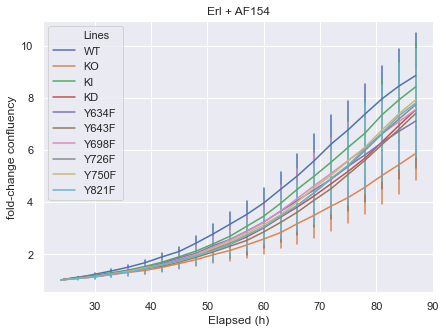

In [51]:
#What doing here and why? subplots vs alternatives?
#multiple plots possible? how? maybe explained later
fig, ax = plt.subplots(1 ,1, figsize=(7, 5))

title = t2
FC_timecourse(ax, ds, itp, ftp, lines, t1, title, ylabel, FC=True)

### 5.3-Code Review

We will first see the output of this code and then we're going to dig deeper in each function

In [92]:
# Function 1
def FC_timecourse(ax, ds, itp, ftp, lines, treatment, title, ylabel, FC=False):
    """ Main function to plot fold-change time course of cell viability data. Initial and final time points must be specified.
    Note that ds should be a list with all biological replicates. """
    c = []

    # Iterate through list of biological replicates, each item is a different BR
    for i in range(len(ds)):
        #Compute fold-change if 'FC=True'
        if FC == True:
            d = ComputeFoldChange(ds[i], itp)

        #Find data for desired treatment
        r = FindTreatmentData(d, treatment, lines)

        # Append the current biological replicate in the list "c" 
        c.append(r)
    
    # Concatenate BRs into same data frame, insert time point labels, and specify range of data points to include
    tplabels = ds[0].iloc[:, 0]
    c = ConcatenateBRs(c, tplabels, ftp, itp)

    # The current data structure is not useful to plot with seaborn. This function transforms it to have all data points in a column
    # while keeping all the labels needed 
    d = TransformTimeCourseMatrixForSeaborn(c, itp, ylabel)

    # Plot
    b = sns.lineplot(x="Elapsed (h)", y=ylabel , hue="Lines", data=d, err_style="bars", ci='sd',  ax=ax)

    if treatment != "UT": # Include legend only in the first subplot 
        ax.legend().remove()

    ax.set_title(title)


# Function 2
def ComputeFoldChange(d, itp):
    """ Take fold-change of the time lapse data set to an initial time point  """
    for jj in range(1, d.columns.size):
        d.iloc[:, jj] /= d[d["Elapsed"] == itp].iloc[0, jj]
    return d


# Function 3
def FindTreatmentData(d, treatment, lines):
    """ Find data corresponding to specified treatment and update columns """
    r = d.loc[:, d.columns.str.contains(treatment)] #Find data corresponding to specified treatment
    r.columns = lines # Rename column labels with point mutations
    return r


# Function 4
def ConcatenateBRs(c, tplabels, ftp, itp):
    """ Concatenate all BRs into the same data structure, insert time point labels, and include only desired range of data points """
    c = pd.concat(c, axis=1) # Concatenate all biological replicates (including data for the specified treatment only), contained in list "c"
    c.insert(0, "Elapsed", tplabels) # Insert time points
    c = c[c["Elapsed"] <= ftp] # Cut the final data frame so that the final values go from the provided initial to final time points
    c = c[c["Elapsed"] >= itp]
    return c


# Function 5
def TransformTimeCourseMatrixForSeaborn(x, itp, ylabel):
    """ Preprocess data to plot with seaborn. Returns a data frame in which each row is a data point in the plot """
    y = pd.DataFrame() # Create new pandas data frame
    elapsed, lines, cv = [], [], [] # This will be the columns we will populate our final data frame with: Time point | Cell Line | Data point
    for idx, row in x.iterrows(): # iterate through each row of the current data set
        row = pd.DataFrame(row).T # Take the current row, convert it to a data frame, and transpose it.
        elapsed.append(list(row["Elapsed"]) * (row.shape[1] - 1)) # Append the time point for each data point in this row. Since it's the same for all, we multiply the current time point times the number of columns to get a list of identical time points of the right length
        lines.append(list(row.columns[1:])) # Append cell lines in this row
        cv.append(row.iloc[0, 1:].values) # Append values of this row
    
    # The generated lists are 'nested lists' (i.e. list of lists, or multi-D lists), this list comprehensions below flattens them to convert them in 1-D lists. 
    y["Elapsed (h)"] = [e for sl in elapsed for e in sl]
    y["Lines"] = [e for sl in lines for e in sl]
    y[ylabel] = [e for sl in cv for e in sl]
    return y

The only function that we call is `FC_timecourse` but as you can see, within this function there are 4 functioons more that perform very specific tasks. Splitting a large series of data transformations and calculations into many small parts is very useful for two main reasons:
1. Helps find bugs.
2. Helps others understand your code. It's also useful to add a brief description of what each of your functions does right below the definition statement.

#### FUNCTION 2: Fold-change

This function calculates the fold-change at each time point to an initial time point of interest:

In [93]:
def ComputeFoldChange(d, itp):
    """ Take fold-change of the time lapse data set to an initial time point  """
    for jj in range(1, d.columns.size):
        d.iloc[:, jj] /= d[d["Elapsed"] == itp].iloc[0, jj]
    return d

In [94]:
itp = 0  # Set initial time point to 0h
br1 = ds[0]
ComputeFoldChange(br1, itp).head()

,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,M4-E,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,3,1.079203,1.058019,1.113484,1.061395,1.042357,1.058353,1.095331,1.055343,1.039441,1.075019,1.078433,1.072179,1.109583,1.055845,1.094375,1.106327,1.052974,1.050777,1.066018,1.048058,1.096925,1.058332,1.029391,1.061510,1.112774,1.289737,1.047027,1.097266,1.089300,1.073409
2,6,1.218831,1.189874,1.275650,1.164750,1.140359,1.219343,1.152249,1.186618,1.162841,1.190035,1.172444,1.178775,1.209362,1.127854,1.207651,1.137116,1.099937,1.080818,1.102250,1.119525,1.165738,1.084293,1.084068,1.068464,1.118739,1.219540,1.100179,1.143170,1.069832,1.119901
3,9,1.276548,1.329640,1.432360,1.178768,1.242661,1.301527,1.240108,1.302819,1.287461,1.236649,1.288490,1.272948,1.281523,1.253840,1.305089,1.248243,1.195354,1.173209,1.232703,1.257545,1.284223,1.130710,1.186484,1.121263,1.230933,1.396173,1.221904,1.213022,1.148238,1.248198
4,12,1.409095,1.440983,1.576139,1.262237,1.377850,1.374223,1.309216,1.412350,1.394292,1.400410,1.419432,1.407594,1.435855,1.358038,1.408390,1.292983,1.305636,1.301529,1.323425,1.349683,1.388445,1.285304,1.325090,1.299448,1.318843,1.587971,1.221185,1.302821,1.243627,1.353456


In [95]:
itp = 24 # Set initial time point to 24
br1 = ds[0]
ComputeFoldChange(br1, itp).set_index("Elapsed").loc[24:36, :]   #24h to 36h

,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,M4-E,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
Elapsed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
27,1.093563,1.105629,1.100230,1.079469,1.090921,1.087140,1.129808,1.086187,1.110866,1.103417,1.089091,1.119741,1.053410,1.082069,1.111021,1.022052,1.098296,1.113177,1.051267,1.072415,1.031506,1.082496,1.112023,1.066146,1.070515,1.090306,0.967292,1.040212,1.021392,1.068771
30,1.171028,1.180081,1.160633,1.174865,1.108123,1.134782,1.199693,1.159136,1.168997,1.122290,1.136055,1.175525,1.157956,1.147352,1.148343,1.076615,1.127164,1.163036,1.057328,1.126389,1.085555,1.148278,1.110192,1.078404,1.113668,1.036086,1.020705,1.100140,1.027111,1.134631
33,1.267596,1.263872,1.260820,1.247263,1.151367,1.197181,1.315349,1.244625,1.281277,1.199479,1.215281,1.255625,1.245233,1.198086,1.230005,1.195863,1.256311,1.224180,1.194276,1.220251,1.163922,1.256909,1.267076,1.140359,1.151025,1.175798,1.133803,1.163615,1.123832,1.201730
36,1.373139,1.357461,1.356610,1.319113,1.187048,1.220846,1.397664,1.322882,1.332105,1.305202,1.239275,1.301184,1.322827,1.293955,1.323377,1.278012,1.282258,1.265498,1.287918,1.280457,1.255939,1.305587,1.313402,1.210831,1.262045,1.271234,1.164956,1.258244,1.149508,1.191476


Let's take a closer look at how this works. We want to iterate through the data columns, and for each one of them, we wante to calculate the fold-change to the initial time point. Note that we start the iteration with index 1: `range(1, x)`, since index 0 corresponds to the columns `Elapsed`.

In [96]:
colSize = br1.columns.size
print("Columns length: ", colSize)
for jj in range(1, colSize):
    print("Current index: ", jj)
    raise SystemExit # This breaks the code to exit the for loop

Columns length:  31
Current index:  1


SystemExit: 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3339: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



Another tool that `pandas` provides to perform calculations on data frames is the possibility of updating the values found in the specified indices – in this case we want to divide all rows `[:, jj]` by the corresponding value at the initial time point `br1[br1["Elapsed"] == itp]`  and matching column `[0, jj]`.

In [97]:
itp = 0
for jj in range(1, colSize):
    itp_data = br1[br1["Elapsed"] == itp].iloc[0, jj]
    br1.iloc[:, jj] /= itp_data

In [98]:
br1.head()

,Elapsed,PC9-UT,PC9-A/E,PC9-E,AXL KO-UT,AXL KO-A/E,AXL KO-E,Kin-UT,Kin-A/E,Kin-E,Kdead-UT,Kdead-A/E,Kdead-E,M4-UT,M4-A/E,M4-E,M5-UT,M5-A/E,M5-E,M7-UT,M7-A/E,M7-E,M10-UT,M10-A/E,M10-E,M11-UT,M11-A/E,M11-E,M15-UT,M15-A/E,M15-E
0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,3,1.079203,1.058019,1.113484,1.061395,1.042357,1.058353,1.095331,1.055343,1.039441,1.075019,1.078433,1.072179,1.109583,1.055845,1.094375,1.106327,1.052974,1.050777,1.066018,1.048058,1.096925,1.058332,1.029391,1.061510,1.112774,1.289737,1.047027,1.097266,1.089300,1.073409
2,6,1.218831,1.189874,1.275650,1.164750,1.140359,1.219343,1.152249,1.186618,1.162841,1.190035,1.172444,1.178775,1.209362,1.127854,1.207651,1.137116,1.099937,1.080818,1.102250,1.119525,1.165738,1.084293,1.084068,1.068464,1.118739,1.219540,1.100179,1.143170,1.069832,1.119901
3,9,1.276548,1.329640,1.432360,1.178768,1.242661,1.301527,1.240108,1.302819,1.287461,1.236649,1.288490,1.272948,1.281523,1.253840,1.305089,1.248243,1.195354,1.173209,1.232703,1.257545,1.284223,1.130710,1.186484,1.121263,1.230933,1.396173,1.221904,1.213022,1.148238,1.248198
4,12,1.409095,1.440983,1.576139,1.262237,1.377850,1.374223,1.309216,1.412350,1.394292,1.400410,1.419432,1.407594,1.435855,1.358038,1.408390,1.292983,1.305636,1.301529,1.323425,1.349683,1.388445,1.285304,1.325090,1.299448,1.318843,1.587971,1.221185,1.302821,1.243627,1.353456


#### FUNCTIONS 3&4

All attributes used in these two figures are covered in section 3.

#### FUNCTION 5

By checking out the input and output of this function it will become easy for you to understand what's going here:

In [129]:
def TransformTimeCourseMatrixForSeaborn(x, itp, ylabel):
    """ Preprocess data to plot with seaborn. Returns a data frame in which each row is a data point in the plot """
    y = pd.DataFrame() # Create new pandas data frame
    elapsed, lines, cv = [], [], [] # This will be the columns we will populate our final data frame with: Time point | Cell Line | Data point
    for idx, row in x.iterrows(): # iterate through each row of the current data set
        row = pd.DataFrame(row).T # Take the current row, convert it to a data frame, and transpose it.
        elapsed.append(list(row["Elapsed"]) * (row.shape[1] - 1)) # Append the time point for each data point in this row. Since it's the same for all, we multiply the current time point times the number of columns to get a list of identical time points of the right length
        lines.append(list(row.columns[1:])) # Append cell lines in this row
        cv.append(row.iloc[0, 1:].values) # Append values of this row
    
    # The generated lists are 'nested lists' (i.e. list of lists, or multi-D lists), this list comprehensions below flattens them to convert them in 1-D lists. 
    #What is going on here?!?! garbage variable names bruh
    y["Elapsed (h)"] = [e for sl in elapsed for e in sl]
    y["Lines"] = [e for sl in lines for e in sl]
    y[ylabel] = [e for sl in cv for e in sl]
    return y

[5, 10, 15]

Below, I'm using `FindTreatmentData` `ConcatenateBRs` to obtain the input `TransformTimeCourseMatrixForSeaborn` uses to generate the final data set used for plotting with `Seaborn`. As you can see, the output of both functions is a horizontal concatenation of the 4 BRs. Thus, we generate a data structure with dimensions 33x41.

In [100]:
concBRs = []
br2 = ds[1]
for i in range(len(ds)):
    m = FindTreatmentData(ds[i], "A/E", lines)
    concBRs.append(m)

c = ConcatenateBRs(concBRs, br2.iloc[:, 0], ftp, itp)
c

,Elapsed,WT,KO,KI,KD,Y634F,Y643F,Y698F,Y726F,Y750F,Y821F,WT,KO,KI,KD,Y634F,Y643F,Y698F,Y726F,Y750F,Y821F,WT,KO,KI,KD,Y634F,Y643F,Y698F,Y726F,Y750F,Y821F,WT,KO,KI,KD,Y634F,Y643F,Y698F,Y726F,Y750F,Y821F
0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.399684,0.605559,0.501760,0.633025,0.559220,0.578054,0.560173,0.526865,0.525961,0.553076,0.479315,0.465318,0.383619,0.425919,0.444632,0.474211,0.407289,0.450207,0.386189,0.517118,0.366149,0.352208,0.404068,0.404286,0.407132,0.490630,0.455274,0.455182,0.416464,0.444438
1,3,1.058019,1.042357,1.055343,1.078433,1.055845,1.052974,1.048058,1.029391,1.289737,1.089300,0.450824,0.713982,0.584200,0.730831,0.686211,0.715327,0.683488,0.645713,0.628219,0.683463,0.498700,0.585999,0.490007,0.484357,0.576964,0.582928,0.569485,0.588283,0.532843,0.652279,0.454030,0.590316,0.594302,0.575933,0.531940,0.704864,0.538311,0.627513,0.525341,0.583319
2,6,1.189874,1.140359,1.186618,1.172444,1.127854,1.099937,1.119525,1.084068,1.219540,1.069832,0.508565,0.751326,0.672883,0.804767,0.748214,0.752286,0.735469,0.695044,0.682696,0.733586,0.536025,0.658533,0.575319,0.573312,0.634006,0.627980,0.602970,0.631444,0.582582,0.722916,0.528738,0.570994,0.572184,0.576153,0.537768,0.554716,0.531986,0.604939,0.531275,0.589069
3,9,1.329640,1.242661,1.302819,1.288490,1.253840,1.195354,1.257545,1.186484,1.396173,1.148238,0.569878,0.812877,0.737851,0.777504,0.804580,0.792217,0.782973,0.779838,0.744528,0.833130,0.597696,0.721825,0.671980,0.632730,0.692666,0.672710,0.649968,0.685554,0.638576,0.789543,0.595454,0.652490,0.636715,0.630366,0.594095,0.350146,0.599880,0.653219,0.601661,0.660260
4,12,1.440983,1.377850,1.412350,1.419432,1.358038,1.305636,1.349683,1.325090,1.587971,1.243627,0.662878,0.855301,0.795625,0.855266,0.851371,0.844497,0.840774,0.804082,0.819835,0.865639,0.692753,0.769280,0.758147,0.622392,0.781365,0.739365,0.727716,0.768652,0.727690,0.843841,0.672856,0.727088,0.673158,0.692129,0.690354,1.235166,0.657278,0.718972,0.682224,0.719044
5,15,1.564174,1.482978,1.546666,1.549360,1.423057,1.380076,1.381711,1.379460,1.610034,1.256381,0.723379,0.875899,0.833704,0.932603,0.920555,0.913187,0.877434,0.865469,0.861558,0.898158,0.788337,0.844566,0.854334,0.739009,0.825571,0.792196,0.805944,0.824056,0.806341,0.924882,0.744566,0.806027,0.731033,0.770672,0.754267,1.055523,0.696218,0.779202,0.747091,0.778440
6,18,1.668017,1.556899,1.599714,1.668054,1.439206,1.447967,1.481035,1.416989,1.562617,1.320898,0.810983,0.931283,0.869872,0.932004,0.928431,0.934111,0.913736,0.891790,0.918364,0.916294,0.860092,0.907495,0.888596,0.813691,0.893181,0.863722,0.880226,0.870880,0.873421,0.964947,0.811767,0.838521,0.822209,0.838646,0.817418,0.873174,0.763071,0.857316,0.806146,0.828531
7,21,1.801804,1.658432,1.802753,1.766368,1.594953,1.568549,1.612376,1.546046,1.815871,1.391291,0.901153,0.960717,0.917959,0.956375,0.986370,0.939979,0.925316,0.923072,0.960127,0.915383,0.928286,0.944372,0.955518,0.928258,0.944518,0.938930,0.937819,0.930010,0.936817,1.043393,0.891660,0.920138,0.878078,0.891058,0.887584,0.918640,0.843471,0.915455,0.891228,0.895659
8,24,1.881569,1.748730,1.882101,1.866352,1.743112,1.631260,1.685766,1.567213,1.913848,1.412930,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,27,2.080318,1.907726,2.044313,2.032627,1.886168,1.791606,1.807840,1.742777,2.086680,1.443154,1.080544,1.042701,1.076521,1.095976,1.092368,1.080946,1.075356,1.084121,1.079541,1.070497,1.138812,1.062911,1.072361,1.030325,1.052611,1.080546,1.032073,1.067248,1.063194,1.126494,1.138329,1.097383,1.146023,1.116732,1.077950,0.953392,1.120950,1.154978,1.157040,1.163904


`TransformTimeCourseMatrixForSeaborn` takes this data frame, and transforms it so that we have only four columns that we will use to plot. As you can see, the number of rows equals to the size of the concatenated data set.

In [101]:
f = TransformTimeCourseMatrixForSeaborn(c, itp, ylabel)
display(f)
assert f.shape[0] == c.iloc[:, 1:].size, "Number of rows of final data set is not the same size of the concatenated data set" #Pass

,Elapsed (h),Lines,fold-change confluency
0,0.0,WT,1.000000
1,0.0,KO,1.000000
2,0.0,KI,1.000000
3,0.0,KD,1.000000
4,0.0,Y634F,1.000000
...,...,...,...
1195,87.0,Y643F,2.286241
1196,87.0,Y698F,4.240020
1197,87.0,Y726F,4.053299
1198,87.0,Y750F,4.012079


Importantly, note that by just including the different replicates with the same labels, seaborn is able to automatically calculate the error bars

### 5.4-Using `plt.subplots()` to generate multiple plots at once

Most of the time you will be generating panels of figures. For instance, in this case we want to compare 4 plots corresponding to each treatment. To do so, it's very convenient to display them together. This specially usefull when you'd like to share the x and/or y axis of each subplot. Finally, even if you only want to make one plot, you can still use `.subplots()`, as I did in the plot above.

#### 1X3 PANEL

Since we only have one row, we just need to iterate through each column `ax[c]`. Note that we can set `sharey=True`.

In [102]:
t1 = ["UT", "A/E", "-E"]
t2 = ["Untreated", "Erl + AF154", "Erlotinib"]

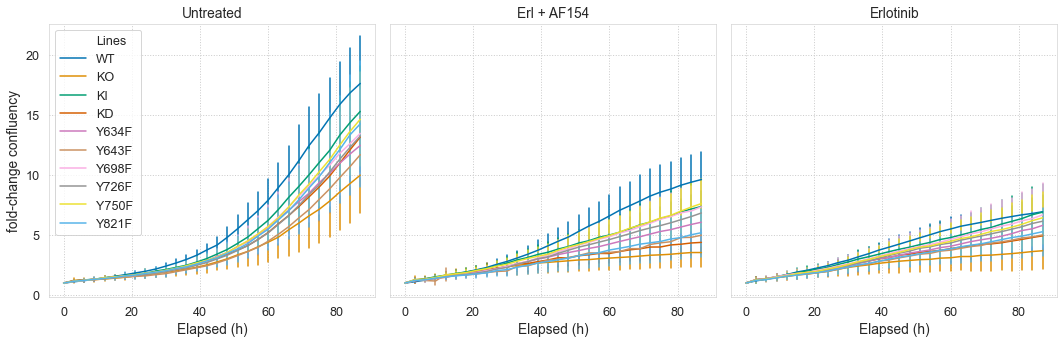

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for i in range(len(t1)):
    title = t2[i]
    FC_timecourse(ax[i], ds, itp, ftp, lines, t1[i], title, ylabel, FC=True)

plt.tight_layout()

#### PANEL WITH MULTIPLE ROWS

Since in this case the panel is 2-dimensional, we need to include a row and a column index every time we plot a graph `ax[r, c]`. Here we can include `sharex=True` as well.

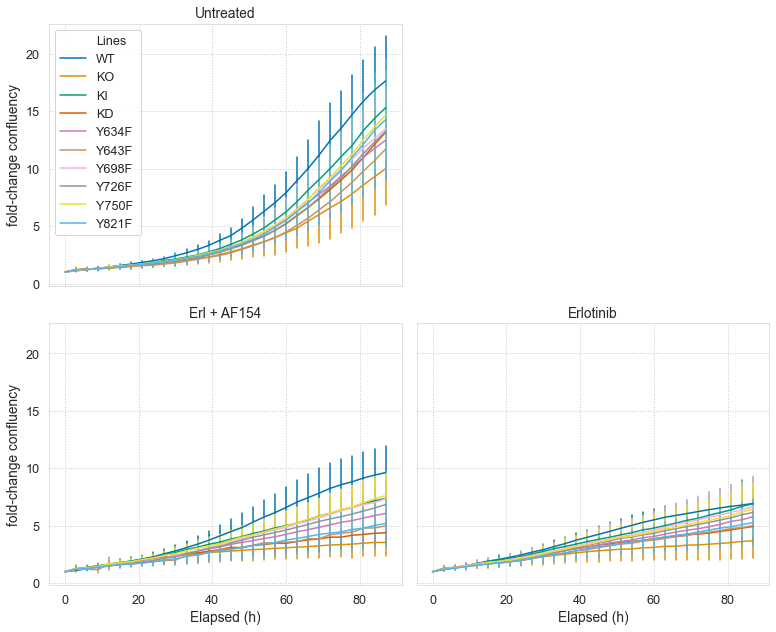

In [104]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 9), sharey=True, sharex=True)

for i in range(len(t1)):
    title = t2[i]
    if i == 0:
        FC_timecourse(ax[0, 0], ds, itp, ftp, lines, t1[i], title, ylabel, FC=True) #plot 0,0
    else:
        FC_timecourse(ax[1, i-1], ds, itp, ftp, lines, t1[i], title, ylabel, FC=True) #plot 1,0 and 1,1

ax[0, 1].remove() # removes plot at location 0, 1
plt.tight_layout()


## 6-Plotting EndPoints with `sns.barplot()`

Here we're going to generate bar plots of the same time lapse data used before at a specified time point. I'm not going to cover line by line what I did this time. I think this is a good opportunity for you to go over this and try to follow my code. Hopefully at this point it will by doable. If you have any questions feel free to reach out.

### 6.1 Define Arguments and Plot

We want to plot the fold-change values at 96h vs t=24h. Again, we are going to use the same strategy as before to locate the data corresponding to each treatment by using `str.contains()` to then update them with `tr2` in the final plot. Note, that in this case we are also indicating the fill colors for each treatment using seaborn's `palette`.

In [105]:
ftp = 72
itp = 24

tr1 = ["-UT", '-E', '-A/E']
tr2 = ["Untreated", 'Erlotinib', 'Erl + AF154']
ylabel = "fold-change confluency"
title = "Endpoint 96h"
colors = ["white", "windows blue", "scarlet"]

In [106]:
ds = [r1, r2, r3, r4]

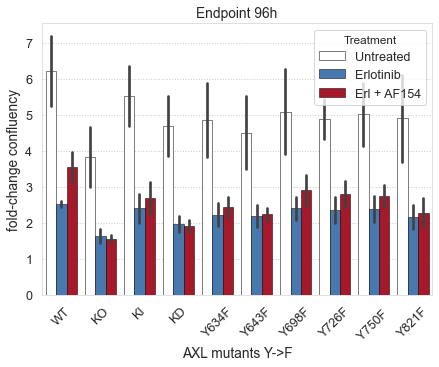

In [107]:
fig, ax = plt.subplots(1 ,1, figsize=(7, 5))

barplot_UtErlAF154(ax, lines, ds, itp, ftp, tr1, tr2, ylabel, title, FC=True, colors=colors)

### 6.2 Code Review

In [108]:
def barplot_UtErlAF154(ax, lines, ds, itp, ftp, tr1, tr2, ylabel, title, FC=False, colors=colors):
    """ Cell viability bar plot at a specific end point across conditions, with error bars.
    Note that ds should be a list containing all biological replicates."""
    c = []
    for d in ds:
        for i, t in enumerate(tr1):
            x = pd.concat([d.iloc[:, 0], d.loc[:, d.columns.str.contains(t)]], axis=1)
            x = FCendpoint(x, itp, ftp, [tr2[i]] * 10, lines, ylabel, FC)
            c.append(x)
    
    c = pd.concat(c)
    pal = sns.xkcd_palette(colors)
    ax = sns.barplot(x="AXL mutants Y->F", y=ylabel, hue="Treatment", data=c, ci="sd", ax=ax, palette=pal, **{"linewidth":.5}, **{"edgecolor":"black"})
    
    ax.set_title(title)
    ax.set_xticklabels(lines, rotation=45)


def FCendpoint(d, itp, ftp, t, l, ylabel, FC):
    """ Compute fold-change plus format for seaborn bar plot. """
    if FC == True:
        dfc = timepoint_fc(d, itp, ftp)
    else: 
        dfc = pd.DataFrame(d[d["Elapsed"] == ftp].iloc[0, 1:]).reset_index()
        dfc.columns = ["index", 0]

    dfc["AXL mutants Y->F"] = l
    dfc["Treatment"] = t
    dfc = dfc[["index", "AXL mutants Y->F", "Treatment", 0]]
    dfc.columns = ["index", "AXL mutants Y->F", "Treatment", ylabel]
    return dfc.iloc[:, 1:]

ote that I didn't cover `barplotFC_TvsUT`. This is because this function is very similar to `barplot_UtErlAF154`, it just calculates the fold-change of each treatment condition to untreated, instead of plotting each condition separately.

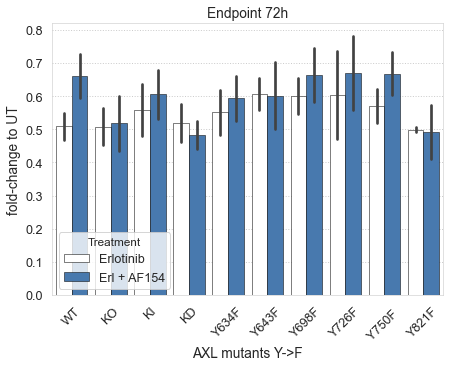

In [109]:
fig, ax = plt.subplots(1 ,1, figsize=(7, 5))

barplotFC_TvsUT(ax, ds, itp, ftp, lines, tr1, tr2, "Endpoint 72h", FC=False, colors=colors)

## 7-Plotting Heatmaps with `sns.clustermap()`

Using again the mass spec data set we imported below in section 4, I'm going to illustrate how to use `sns.clustermap()`

In [110]:
x.head()

,Protein,Sequence,UniprotAcc,Position,Gene,PC9 A,KO A,Kd A,KI A,M4 A,M5 A,M7 A,M10 A,M11 A,M15 A
0,"1-phosphatidylinositol 4,5-bisphosphate phosphodiesterase gamma-1",TAEPDyGALYE,P19174,Y771-p,PLCG1,0.442233,-0.376900,-0.306242,-0.174120,0.151374,-0.174773,0.377491,0.080910,0.083282,-0.103255
1,26S proteasome regulatory subunit 4,DKKKKyEPPVP,P62191,Y25-p,PSMC1,-0.108045,-0.476332,-0.321637,-0.239781,0.126419,0.274226,0.243800,0.210842,0.326859,-0.036352
2,40S ribosomal protein S10,NRIAIyELLFK,P46783,Y12-p,RPS10,-0.169514,0.097204,-1.712342,0.173058,0.152218,-0.295116,0.846713,1.092283,-0.347285,0.162782
3,40S ribosomal protein S27,QSPNSyFMDVK,P42677,Y31-p,RPS27,0.082490,0.200079,-0.232125,-0.157827,-0.044641,0.003688,0.105528,0.166206,-0.118248,-0.005150
4,40S ribosomal protein S3,VRRACyGVLRF,P23396,Y120-p,RPS3,0.008689,0.038838,0.028220,0.080284,0.036093,-0.080454,-0.293247,0.044539,0.125868,0.011169


In [111]:
data = x.iloc[:, 5:]

In [112]:
figsize = (10, 10)
title = "Hierarchical Clustering"

`cmap` defined the color palette that will be used, `robust=True` ignores outliers that would otherwise mask the overall signal present in the heatmap. Try setting it to `False` to see the difference.

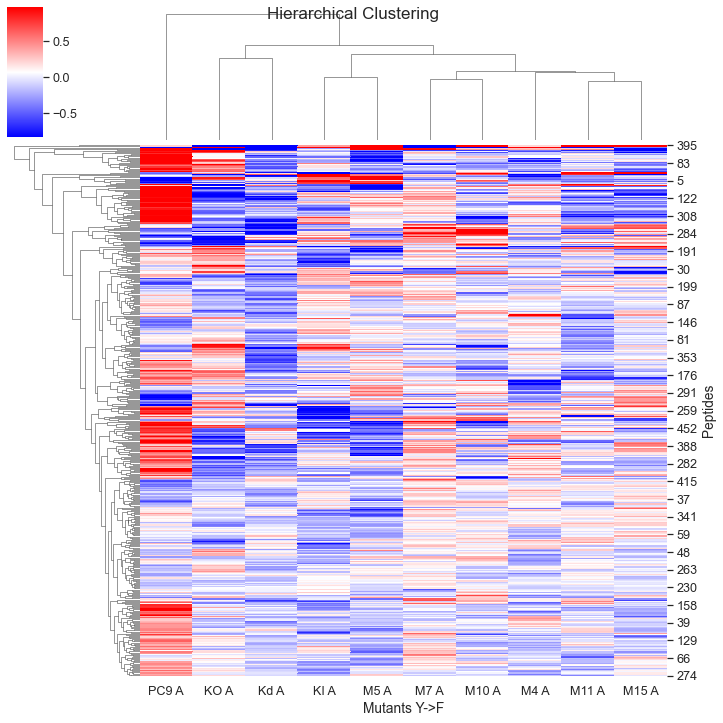

In [113]:
g = sns.clustermap(
        data,
        method="complete",
        cmap="bwr",
        robust=True,
        figsize=figsize)
g.fig.suptitle(title, fontsize=17)
ax = g.ax_heatmap
ax.set_ylabel("Peptides")
ax.set_xlabel("Mutants Y->F");

Instead of using `robust`, you can also set the upper and lower limit yourself by defining `vmax` and `vmin` such as:

In [114]:
lim = max(np.max(np.abs(data)) * 0.5)    # This set as the limit the 50% of the absolute maximum values of the data set 

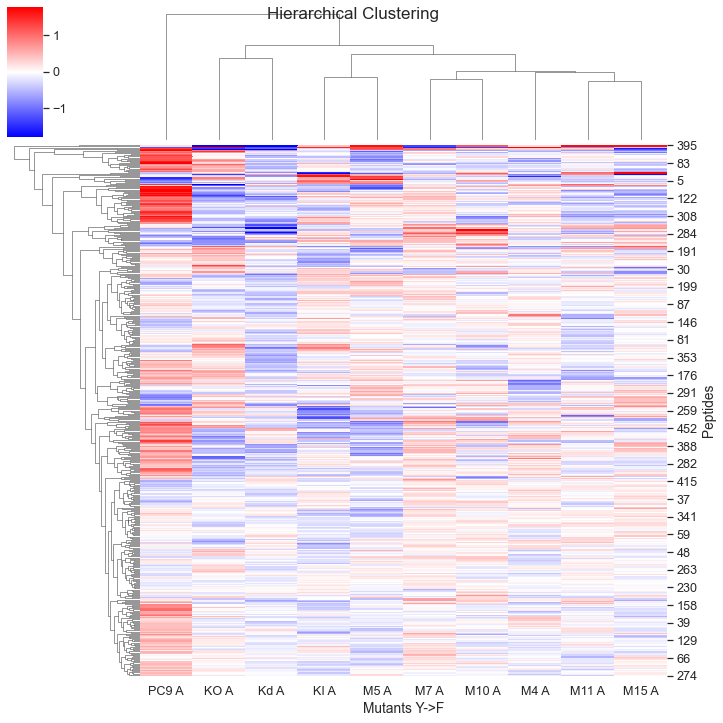

In [115]:
g = sns.clustermap(
        data,
        method="complete",
        cmap="bwr",
        figsize=figsize,
        vmax=lim,
        vmin=-lim)
g.fig.suptitle(title, fontsize=17)
ax = g.ax_heatmap
ax.set_ylabel("Peptides")
ax.set_xlabel("Mutants Y->F");

Another great way you can leverage pandas in this situation is setting the index to the gene names so that they show up in the heatmap. In this case there are way too many peptides to show them all and you'd have to increase the size by a lot but that's still useful to show specific peptides of interest or when dealing with smaller data sets:

In [116]:
dI = data.assign(Gene=x["Gene"]).set_index("Gene")

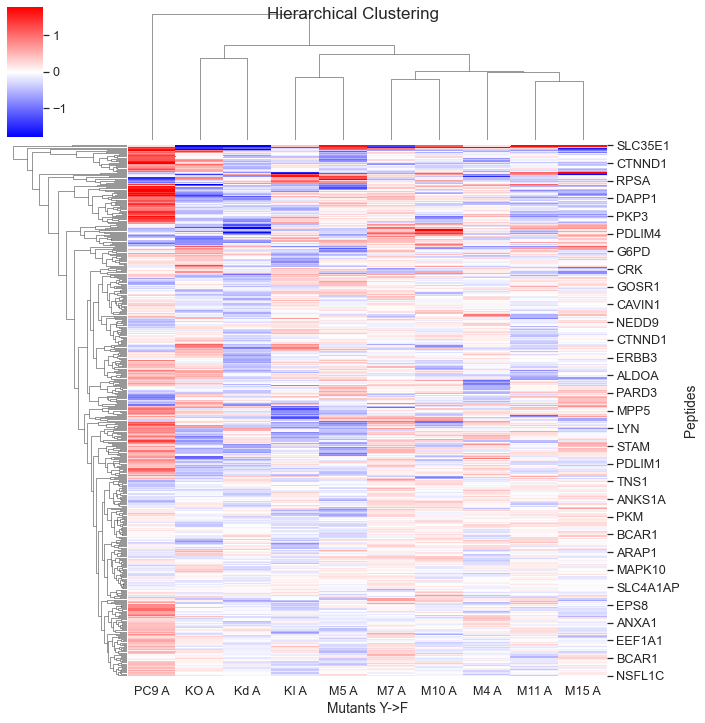

In [117]:
g = sns.clustermap(
        dI,
        method="complete",
        cmap="bwr",
        figsize=figsize,
        vmax=lim,
        vmin=-lim)
g.fig.suptitle(title, fontsize=17)
ax = g.ax_heatmap
ax.set_ylabel("Peptides")
ax.set_xlabel("Mutants Y->F");

In [123]:
a=[1,2,3,4,5]
print(a)
b=[6,7,8,9,10]
a.extend(b)
print(a)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
